In [1]:
import sklearn
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, zero_one_loss, classification_report, confusion_matrix, \
precision_score, recall_score, f1_score, plot_roc_curve,plot_confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score, validation_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [2]:
ESRB_df = pd.read_csv("Video_games_esrb_rating.csv")

In [3]:
ESRB_df.head()

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T


In [4]:
ESRB_df.tail()

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
1890,SENRAN KAGURA Peach Beach Splash,0,0,0,0,0,0,0,0,1,...,1,1,0,1,0,0,0,0,0,M
1891,Sneaky Bears,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,T
1892,SPARC,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1893,Still Time,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,T
1894,Surf World Series,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E


In [5]:
ESRB_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1895 entries, 0 to 1894
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     1895 non-null   object
 1   console                   1895 non-null   int64 
 2   alcohol_reference         1895 non-null   int64 
 3   animated_blood            1895 non-null   int64 
 4   blood                     1895 non-null   int64 
 5   blood_and_gore            1895 non-null   int64 
 6   cartoon_violence          1895 non-null   int64 
 7   crude_humor               1895 non-null   int64 
 8   drug_reference            1895 non-null   int64 
 9   fantasy_violence          1895 non-null   int64 
 10  intense_violence          1895 non-null   int64 
 11  language                  1895 non-null   int64 
 12  lyrics                    1895 non-null   int64 
 13  mature_humor              1895 non-null   int64 
 14  mild_blood              

In [6]:
ESRB_df.isnull().sum()

title                       0
console                     0
alcohol_reference           0
animated_blood              0
blood                       0
blood_and_gore              0
cartoon_violence            0
crude_humor                 0
drug_reference              0
fantasy_violence            0
intense_violence            0
language                    0
lyrics                      0
mature_humor                0
mild_blood                  0
mild_cartoon_violence       0
mild_fantasy_violence       0
mild_language               0
mild_lyrics                 0
mild_suggestive_themes      0
mild_violence               0
no_descriptors              0
nudity                      0
partial_nudity              0
sexual_content              0
sexual_themes               0
simulated_gambling          0
strong_janguage             0
strong_sexual_content       0
suggestive_themes           0
use_of_alcohol              0
use_of_drugs_and_alcohol    0
violence                    0
esrb_ratin

In [7]:
ESRB_df['no_descriptors'].value_counts()[1]

322

In [15]:
#Drop the title, console and those with no descriptors because they don't need to be included in the variable analysis
ESRB_df = ESRB_df[ESRB_df['no_descriptors'] == 0]
ESRB_df = ESRB_df.drop(columns=['title','console','no_descriptors'])

#Clean the spelling errors

ESRB_df.rename(columns = {'strong_janguage':'strong_language'}, inplace = True)

In [16]:
ESRB_df.head()

,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,language,...,sexual_content,sexual_themes,simulated_gambling,strong_language,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,ET
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,T
6,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,T


In [17]:
for col in ESRB_df:
    print(ESRB_df[col].name)
    print(ESRB_df[col].unique())

alcohol_reference
[0 1]
animated_blood
[1 0]
blood
[0 1]
blood_and_gore
[0 1]
cartoon_violence
[0 1]
crude_humor
[0 1]
drug_reference
[0 1]
fantasy_violence
[0 1]
intense_violence
[1 0]
language
[0 1]
lyrics
[0 1]
mature_humor
[0 1]
mild_blood
[0 1]
mild_cartoon_violence
[0 1]
mild_fantasy_violence
[0 1]
mild_language
[0 1]
mild_lyrics
[0 1]
mild_suggestive_themes
[1 0]
mild_violence
[0 1]
nudity
[0 1]
partial_nudity
[0 1]
sexual_content
[0 1]
sexual_themes
[0 1]
simulated_gambling
[0 1]
strong_language
[0 1]
strong_sexual_content
[0 1]
suggestive_themes
[0 1]
use_of_alcohol
[0 1]
use_of_drugs_and_alcohol
[0 1]
violence
[0 1]
esrb_rating
['ET' 'M' 'T' 'E']


In [18]:
ESRB_df['esrb_rating'].value_counts()

T     652
ET    388
M     383
E     150
Name: esrb_rating, dtype: int64

<AxesSubplot:>

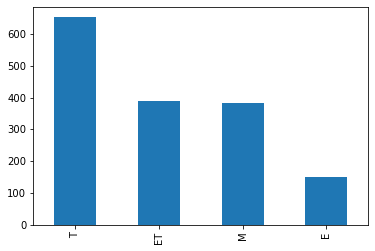

In [19]:
ESRB_df['esrb_rating'].value_counts().plot(kind = 'bar')

PART 1 - DECISION TREE

In [20]:
ESRB_y = ESRB_df['esrb_rating']
ESRB_X = ESRB_df.drop(columns=['esrb_rating'])

X_Train, X_Test, y_train, y_test = train_test_split(ESRB_X, ESRB_y, test_size = 0.25, random_state = 42)

print(X_Train.shape, y_train.shape, X_Test.shape, y_test.shape)

(1179, 30) (1179,) (394, 30) (394,)


In [21]:
dtree = tree.DecisionTreeClassifier()

esrb_tree = dtree.fit(X_Train, y_train)

y_train_pred = esrb_tree.predict(X_Train)
y_test_pred = esrb_tree.predict(X_Test)

print(f"Y_Train_Pred: {y_train_pred[:100]}")
print("\n")
print(f"Y_Test_Pred: {y_test_pred[:100]}")

Y_Train_Pred: ['ET' 'T' 'ET' 'M' 'T' 'E' 'E' 'ET' 'T' 'E' 'ET' 'T' 'T' 'ET' 'T' 'M' 'M'
 'T' 'T' 'ET' 'T' 'E' 'T' 'T' 'ET' 'ET' 'T' 'M' 'T' 'T' 'T' 'E' 'M' 'ET'
 'ET' 'T' 'ET' 'T' 'T' 'T' 'T' 'M' 'T' 'ET' 'T' 'ET' 'E' 'ET' 'T' 'M' 'M'
 'M' 'M' 'T' 'M' 'E' 'T' 'ET' 'ET' 'ET' 'T' 'T' 'T' 'E' 'T' 'E' 'T' 'M'
 'E' 'E' 'T' 'ET' 'ET' 'T' 'T' 'E' 'ET' 'T' 'ET' 'T' 'M' 'ET' 'ET' 'T'
 'ET' 'E' 'T' 'T' 'T' 'T' 'T' 'T' 'ET' 'M' 'ET' 'ET' 'T' 'ET' 'ET' 'M']


Y_Test_Pred: ['T' 'M' 'ET' 'M' 'T' 'T' 'T' 'ET' 'E' 'M' 'ET' 'T' 'T' 'E' 'ET' 'T' 'ET'
 'ET' 'ET' 'ET' 'M' 'M' 'T' 'E' 'E' 'T' 'T' 'T' 'ET' 'ET' 'M' 'E' 'T' 'T'
 'M' 'M' 'M' 'T' 'M' 'ET' 'ET' 'M' 'E' 'T' 'ET' 'T' 'ET' 'M' 'T' 'ET' 'T'
 'ET' 'M' 'T' 'T' 'ET' 'T' 'ET' 'M' 'T' 'ET' 'ET' 'T' 'M' 'M' 'ET' 'E' 'T'
 'E' 'ET' 'M' 'ET' 'ET' 'ET' 'E' 'ET' 'M' 'M' 'M' 'T' 'T' 'T' 'E' 'T' 'T'
 'M' 'T' 'T' 'ET' 'M' 'T' 'T' 'T' 'ET' 'ET' 'T' 'ET' 'E' 'T' 'M']


In [22]:
print('Model accuracy score: {0:0.2f}'. format(accuracy_score(y_test, y_test_pred)))

Model accuracy score: 0.80


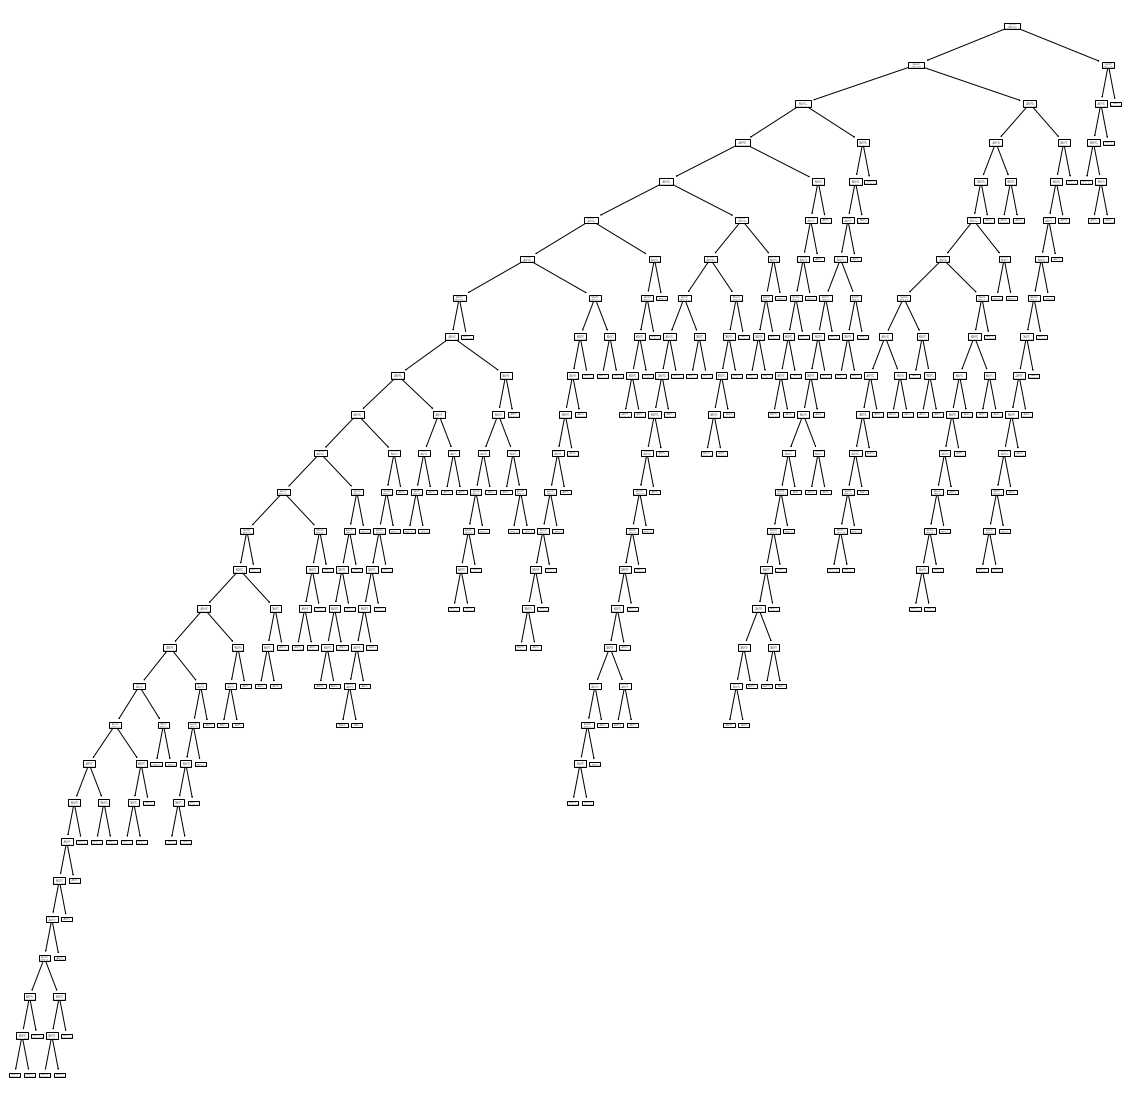

In [23]:
plt.figure(figsize=(20, 20))
tree.plot_tree(esrb_tree)
plt.savefig('books_read.png')
plt.show()

In [24]:
feature_names = X_Train.columns.values
importance = esrb_tree.tree_.compute_feature_importances()

In [25]:
feature_names

array(['alcohol_reference', 'animated_blood', 'blood', 'blood_and_gore',
       'cartoon_violence', 'crude_humor', 'drug_reference',
       'fantasy_violence', 'intense_violence', 'language', 'lyrics',
       'mature_humor', 'mild_blood', 'mild_cartoon_violence',
       'mild_fantasy_violence', 'mild_language', 'mild_lyrics',
       'mild_suggestive_themes', 'mild_violence', 'nudity',
       'partial_nudity', 'sexual_content', 'sexual_themes',
       'simulated_gambling', 'strong_language', 'strong_sexual_content',
       'suggestive_themes', 'use_of_alcohol', 'use_of_drugs_and_alcohol',
       'violence'], dtype=object)

In [26]:
importance

array([0.01958968, 0.01239466, 0.06048092, 0.09009111, 0.01549784,
       0.01226332, 0.0142403 , 0.11606253, 0.02540855, 0.02376258,
       0.01533489, 0.00586862, 0.01544943, 0.01392837, 0.08639653,
       0.01296998, 0.0165629 , 0.01934925, 0.01223939, 0.00638357,
       0.00585231, 0.01070526, 0.02432981, 0.03521395, 0.20834865,
       0.02855685, 0.04600508, 0.0120388 , 0.00292907, 0.03174578])

In [27]:
importance_df = pd.DataFrame(feature_names, columns = ['features'])

#importance_df['importance'] = importance

In [28]:
importance_df['importance'] = importance

In [29]:
importance_df

,features,importance
0,alcohol_reference,0.019590
1,animated_blood,0.012395
2,blood,0.060481
3,blood_and_gore,0.090091
4,cartoon_violence,0.015498
5,crude_humor,0.012263
6,drug_reference,0.014240
7,fantasy_violence,0.116063
8,intense_violence,0.025409
9,language,0.023763


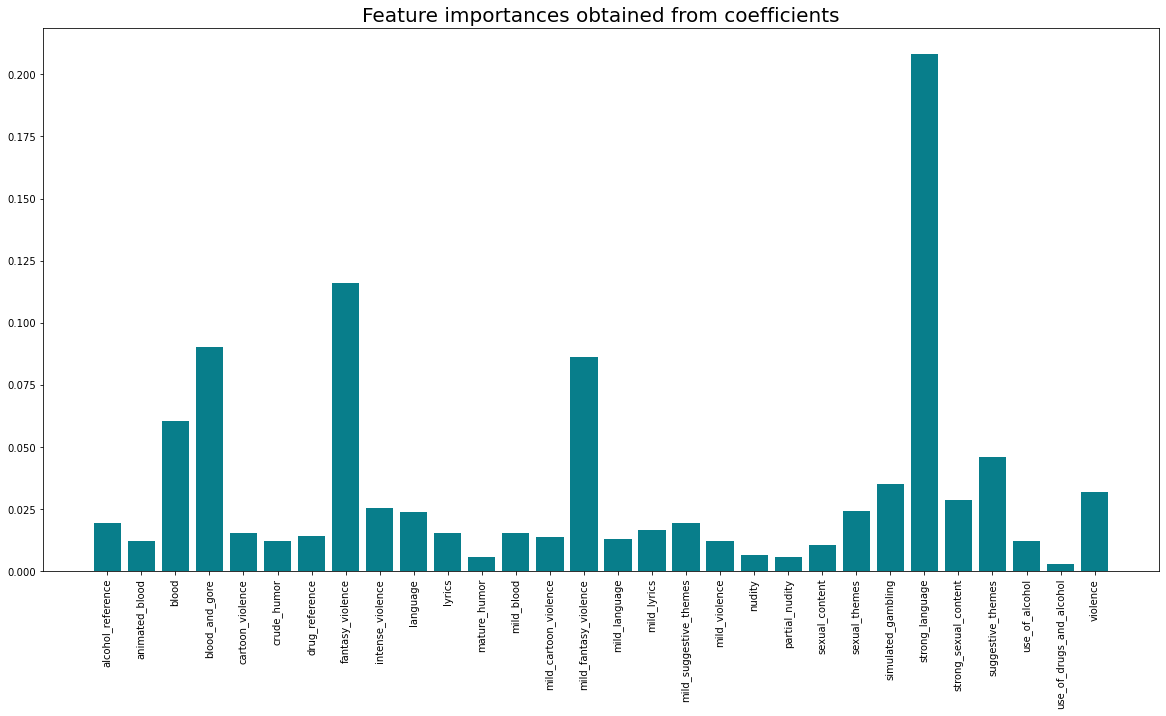

In [30]:
plt.figure(figsize=(20, 10))
plt.bar(x=importance_df['features'], height=importance_df['importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [31]:
Errors = {}
Errors_list = []

for i in range(1, esrb_tree.tree_.max_depth):
    clf = tree.DecisionTreeClassifier(max_depth = i)
    clf = clf.fit(X_Train, y_train)
    y_train_pred = clf.predict(X_Train)
    ac_score = accuracy_score(y_train, y_train_pred)
    Errors[i] = 1 - ac_score
    Errors_list.append(1 - ac_score)
    
Errors_DF = pd.DataFrame(Errors.items(), columns=['Depth', 'Error'])
Errors_DF

,Depth,Error
0,1,0.465649
1,2,0.370653
2,3,0.315522
3,4,0.257846
4,5,0.243427
5,6,0.231552
6,7,0.225615
7,8,0.193384
8,9,0.189143
9,10,0.165394


<AxesSubplot:xlabel='Depth'>

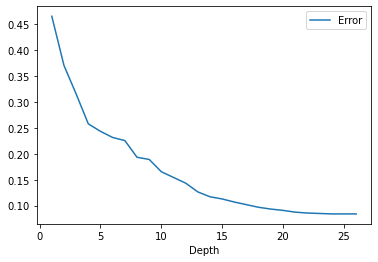

In [32]:
Errors_DF.plot('Depth','Error')

In [33]:
esrb_tree2 = tree.DecisionTreeClassifier(max_depth = 25, random_state=42)
esrb_model_tree2 = esrb_tree2.fit(X_Train, y_train)
y_test_pred2 = esrb_model_tree2.predict(X_Test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_test_pred2)))

Model accuracy score: 0.8020


<AxesSubplot:>

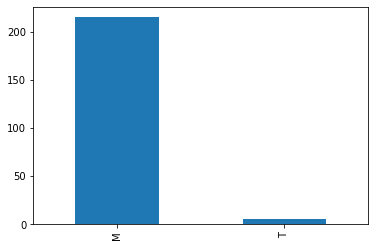

In [34]:
language = ESRB_df[ESRB_df['strong_language'] == 1]
language['esrb_rating'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

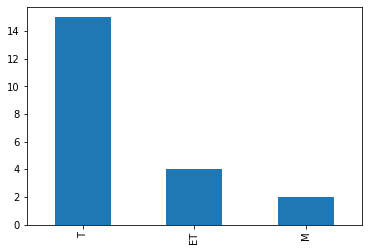

In [35]:
mature_humor = ESRB_df[ESRB_df['mature_humor'] == 1]
mature_humor['esrb_rating'].value_counts().plot(kind = 'bar')

In [36]:
ESRB_filtered = ESRB_df.filter(['strong_language','fantasy_violence','blood','blood_and_gore','suggestive_themes','esrb_rating'])

ESRB_filtered_y = ESRB_filtered['esrb_rating']
ESRB_filtered_X = ESRB_filtered.drop(columns = ['esrb_rating'])

Filtered_X_Train, Filtered_X_Test, Filtered_y_train, Filtered_y_test = train_test_split(ESRB_filtered_X, ESRB_filtered_y, test_size = 0.25, random_state = 42)

print(Filtered_X_Train.shape, Filtered_X_Test.shape, Filtered_y_train.shape, Filtered_y_test.shape)


(1179, 5) (394, 5) (1179,) (394,)


In [37]:
filtered_tree = dtree.fit(Filtered_X_Train, Filtered_y_train)
filtered_test_pred = filtered_tree.predict(Filtered_X_Test)
print('Model accuracy score: {0:0.2f}'. format(accuracy_score(Filtered_y_test, filtered_test_pred)))

Model accuracy score: 0.70


PART 2 - RANDOM FOREST

In [38]:
RFC = RandomForestClassifier()

RFC_model = RFC.fit(X_Train, y_train)

RFC_y_train_pred = RFC.predict(X_Train)
RFC_y_test_pred = RFC.predict(X_Test)

print(f"Y_Train_Pred: {y_train_pred[:100]}")
print("\n")
print(f"Y_Test_Pred: {y_test_pred[:100]}")

Y_Train_Pred: ['ET' 'T' 'ET' 'M' 'T' 'E' 'E' 'ET' 'T' 'E' 'ET' 'T' 'T' 'ET' 'T' 'M' 'M'
 'T' 'T' 'ET' 'T' 'E' 'T' 'T' 'ET' 'ET' 'T' 'M' 'T' 'T' 'T' 'E' 'M' 'ET'
 'ET' 'T' 'ET' 'T' 'T' 'T' 'T' 'M' 'T' 'ET' 'T' 'ET' 'E' 'ET' 'T' 'M' 'M'
 'M' 'M' 'T' 'M' 'E' 'T' 'ET' 'ET' 'ET' 'T' 'T' 'T' 'E' 'T' 'E' 'T' 'M'
 'E' 'E' 'T' 'ET' 'ET' 'T' 'T' 'E' 'ET' 'T' 'ET' 'T' 'M' 'ET' 'ET' 'T'
 'ET' 'E' 'T' 'T' 'T' 'T' 'T' 'T' 'ET' 'M' 'ET' 'ET' 'T' 'ET' 'ET' 'M']


Y_Test_Pred: ['T' 'M' 'ET' 'M' 'T' 'T' 'T' 'ET' 'E' 'M' 'ET' 'T' 'T' 'E' 'ET' 'T' 'ET'
 'ET' 'ET' 'ET' 'M' 'M' 'T' 'E' 'E' 'T' 'T' 'T' 'ET' 'ET' 'M' 'E' 'T' 'T'
 'M' 'M' 'M' 'T' 'M' 'ET' 'ET' 'M' 'E' 'T' 'ET' 'T' 'ET' 'M' 'T' 'ET' 'T'
 'ET' 'M' 'T' 'T' 'ET' 'T' 'ET' 'M' 'T' 'ET' 'ET' 'T' 'M' 'M' 'ET' 'E' 'T'
 'E' 'ET' 'M' 'ET' 'ET' 'ET' 'E' 'ET' 'M' 'M' 'M' 'T' 'T' 'T' 'E' 'T' 'T'
 'M' 'T' 'T' 'ET' 'M' 'T' 'T' 'T' 'ET' 'ET' 'T' 'ET' 'E' 'T' 'M']


In [39]:
print('Train model accuracy score: {0:0.2f}'. format(accuracy_score(y_train, RFC_y_train_pred)))
print('Test model accuracy score: {0:0.2f}'. format(accuracy_score(y_test, RFC_y_test_pred)))

Train model accuracy score: 0.92
Test model accuracy score: 0.81


In [40]:
Errors = {}
Errors_list = []

for i in range(1, 30):
    clf = RandomForestClassifier(max_depth=i, random_state=42)
    clf = clf.fit(X_Train, y_train)
    y_train_pred = clf.predict(X_Train)
    ac_score = accuracy_score(y_train, y_train_pred)
    Errors[i] = ac_score
    Errors_list.append(ac_score)

In [41]:
Errors_DF = pd.DataFrame(Errors.items(), columns=['Depth', 'Accuracy'])
Errors_DF

,Depth,Accuracy
0,1,0.479220
1,2,0.693808
2,3,0.742154
3,4,0.756573
4,5,0.774385
5,6,0.797286
6,7,0.826972
7,8,0.830365
8,9,0.842239
9,10,0.860051


In [42]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_depth' : [16,20,24,28],
    'criterion' :['gini', 'entropy']}

In [44]:
CV_RFC = GridSearchCV(estimator=RFC, param_grid=param_grid, cv= 5)
CV_RFC.fit(X_Train, y_train).best_params_

{'criterion': 'entropy', 'max_depth': 24, 'n_estimators': 200}

In [45]:
RFC_Tuned = RandomForestClassifier(n_estimators= 500, max_depth=20, criterion='entropy')

RFC_Tuned_model = RFC_Tuned.fit(X_Train, y_train)

RFC_Tuned_y_train_pred = RFC_Tuned_model.predict(X_Train)
RFC_Tuned_y_test_pred = RFC_Tuned_model.predict(X_Test)

print('Train model accuracy score: {0:0.2f}'. format(accuracy_score(y_train, RFC_Tuned_y_train_pred)))
print('Test model accuracy score: {0:0.2f}'. format(accuracy_score(y_test, RFC_Tuned_y_test_pred)))

Train model accuracy score: 0.92
Test model accuracy score: 0.81


In [46]:
forest_importances = RFC_Tuned_model.feature_importances_
rfc_importance_df = pd.DataFrame(feature_names, columns = ['features'])
rfc_importance_df['importance'] = forest_importances

In [47]:
rfc_importance_df

,features,importance
0,alcohol_reference,0.022600
1,animated_blood,0.005049
2,blood,0.113350
3,blood_and_gore,0.116836
4,cartoon_violence,0.014224
5,crude_humor,0.022896
6,drug_reference,0.010630
7,fantasy_violence,0.101056
8,intense_violence,0.032539
9,language,0.026707


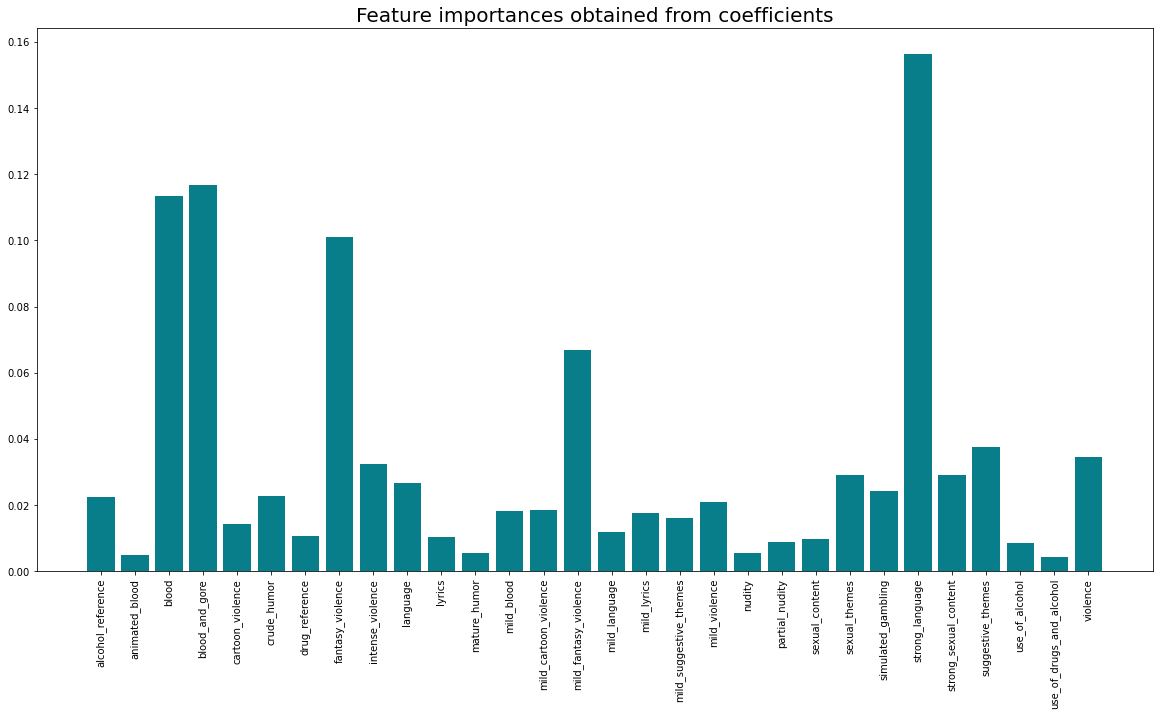

In [48]:
plt.figure(figsize=(20, 10))
plt.bar(x=rfc_importance_df['features'], height=rfc_importance_df['importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [49]:
ESRB_filtered_RFC = ESRB_df.filter(['mature_humor','intense_violence','simulated_gambling','blood_and_gore','violence','esrb_rating'])

RFC_ESRB_filtered_y = ESRB_filtered_RFC['esrb_rating']
RFC_ESRB_filtered_X = ESRB_filtered_RFC.drop(columns = ['esrb_rating'])

RFC_Filtered_X_Train, RFC_Filtered_X_Test, RFC_Filtered_y_train, RFC_Filtered_y_test = train_test_split(RFC_ESRB_filtered_X, RFC_ESRB_filtered_y, test_size = 0.25, random_state = 42)

print(RFC_Filtered_X_Train.shape, RFC_Filtered_X_Test.shape, RFC_Filtered_y_train.shape, RFC_Filtered_y_test.shape)


(1179, 5) (394, 5) (1179,) (394,)


In [50]:
filtered_rfc = RFC_Tuned.fit(RFC_Filtered_X_Train, RFC_Filtered_y_train)
rfc_filtered_test_pred = filtered_rfc.predict(RFC_Filtered_X_Test)
print('Model accuracy score: {0:0.2f}'. format(accuracy_score(RFC_Filtered_y_test, rfc_filtered_test_pred)))

Model accuracy score: 0.52


Part 3: XGBoost

In [136]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

O = OrdinalEncoder()
ESRB_y = pd.DataFrame(O.fit_transform(np.array(ESRB_df['esrb_rating']).reshape(-1,1)))
ESRB_X = ESRB_df.drop(columns=['esrb_rating'])

XG_X_Train, XG_X_Test, XG_Y_Train, XG_Y_Test = train_test_split(ESRB_X, ESRB_y, test_size = .25, random_state = 42)

print(XG_X_Train.shape, XG_X_Test.shape, XG_Y_Train.shape, XG_Y_Test.shape)

(1179, 30) (394, 30) (1179, 1) (394, 1)


In [138]:
xgb_cl = xgb.XGBClassifier()

# Fit
xgb_cl.fit(XG_X_Train, XG_Y_Train)

# Predict
preds_t = xgb_cl.predict(XG_X_Train)
preds = xgb_cl.predict(XG_X_Test)

# Score
print('Train model accuracy score: {0:0.2f}'. format(accuracy_score(XG_Y_Train, preds_t)))
print('Test model accuracy score: {0:0.2f}'. format(accuracy_score(XG_Y_Test, preds)))

Train model accuracy score: 0.92
Test model accuracy score: 0.82


In [99]:
param_grid = {
    "max_depth": [5, 10, 15, 20],
    "learning_rate": [0.1, 0.01, 0.05, 0.2],
    "gamma": [0, 0.25, 0.5, 0.75, 1],
    "reg_lambda": [0, 1, 10],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
    "importance_type":['gain','entropy']
}

In [100]:
XGB_grid = GridSearchCV(xgb_cl, param_grid, n_jobs = -1, cv = 5)

In [101]:
Best_XGB = XGB_grid.fit(XG_X_Train, XG_Y_Train)

In [102]:
Best_XGB.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.2,
 'max_depth': 10,
 'reg_lambda': 0,
 'subsample': 0.8}

In [140]:
Final_XGB = xgb.XGBClassifier(colsample_bytree = 0.5, gamma = 0, importance_type = 'gain', learning_rate = 0.2, max_depth = 10, reg_lambda = 0, subsample = 0.8)

In [141]:
Final_XGB.fit(XG_X_Train, XG_Y_Train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [142]:
# Predict
preds_t = Final_XGB.predict(XG_X_Train)
preds = Final_XGB.predict(XG_X_Test)

# Score
print('Train model accuracy score: {0:0.2f}'. format(accuracy_score(XG_Y_Train, preds_t)))
print('Test model accuracy score: {0:0.2f}'. format(accuracy_score(XG_Y_Test, preds)))

Train model accuracy score: 0.91
Test model accuracy score: 0.82


<Figure size 2880x1440 with 0 Axes>

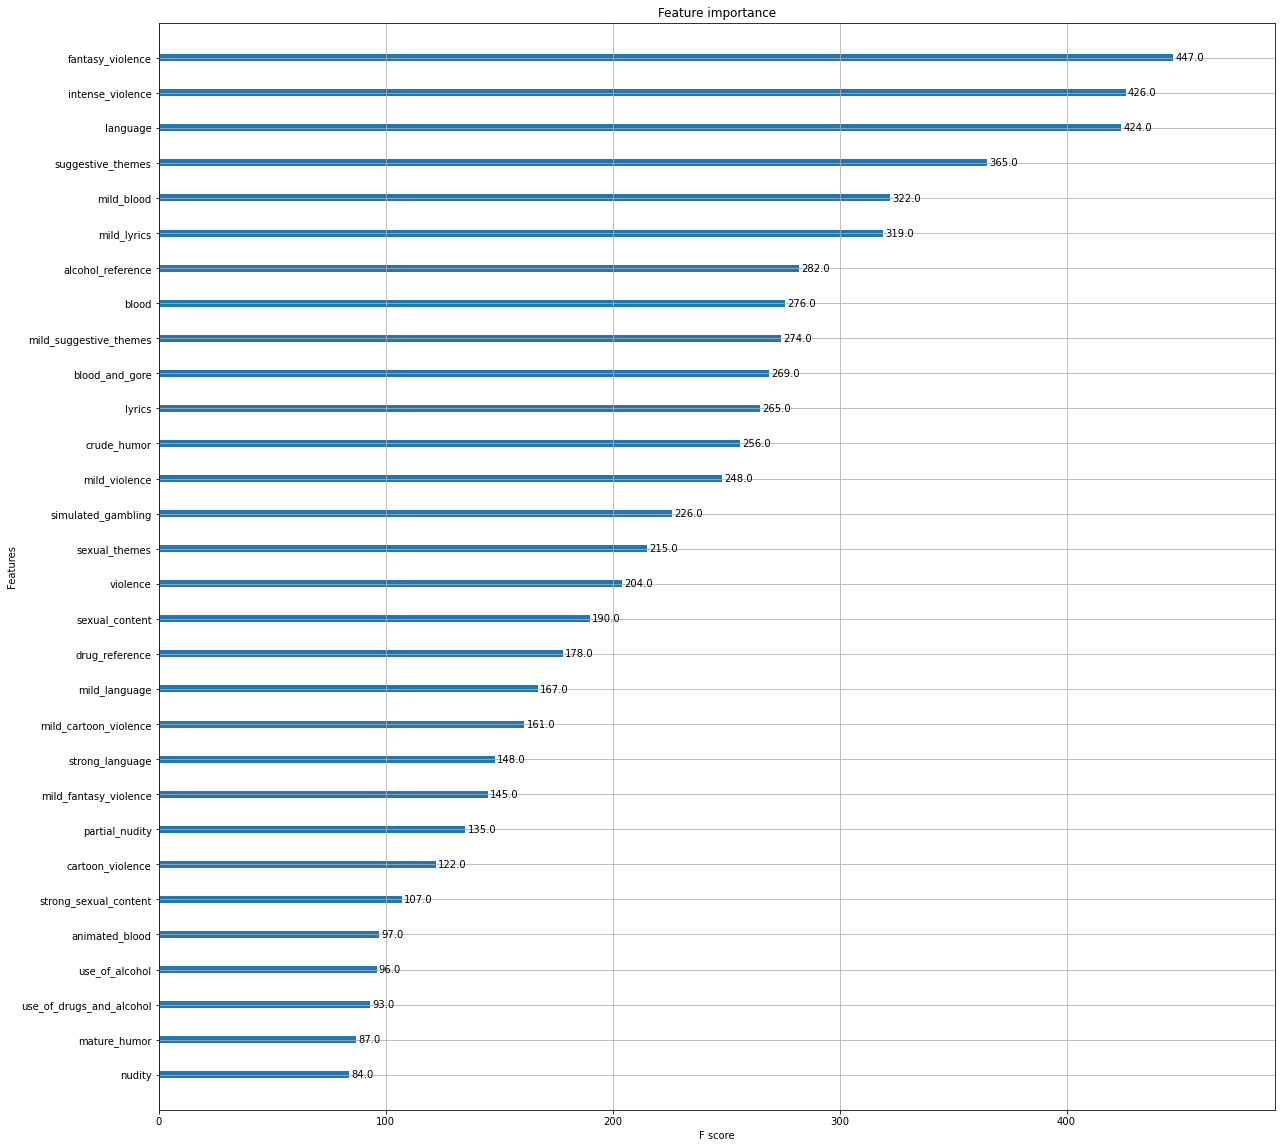

In [143]:
plt.figure(figsize=(40,20))
xgb.plot_importance(Final_XGB)
plt.rcParams["figure.figsize"] = (20,20)

In [144]:
ESRB_XG_filtered = ESRB_df.filter(['fantasy_violence', 'blood_and_gore','mild_suggestive_themes','blood','alcohol_reference','mild_lyrics','mild_blood','suggestive_themes','language','intense_violence','esrb_rating'])
ESRB_XG_filtered

,fantasy_violence,blood_and_gore,mild_suggestive_themes,blood,alcohol_reference,mild_lyrics,mild_blood,suggestive_themes,language,intense_violence,esrb_rating
1,0,0,1,0,0,0,0,0,0,1,ET
2,0,0,0,1,0,0,0,1,0,0,M
3,1,0,0,0,0,0,1,0,1,0,ET
4,1,0,0,0,0,0,0,1,1,0,T
6,0,0,0,1,0,0,0,0,0,1,T
...,...,...,...,...,...,...,...,...,...,...,...
1887,0,0,0,0,0,0,0,0,0,0,T
1889,0,0,1,0,1,0,0,0,0,1,ET
1890,1,0,0,0,0,0,0,0,0,0,M
1891,1,0,0,0,0,0,0,0,1,0,T


In [145]:
ESRB_filtered_y = pd.DataFrame(O.fit_transform(np.array(ESRB_XG_filtered['esrb_rating']).reshape(-1,1)))
ESRB_filtered_X = ESRB_XG_filtered.drop(columns=['esrb_rating'])

XG_X_Train, XG_X_Test, XG_Y_Train, XG_Y_Test = train_test_split(ESRB_filtered_X, ESRB_filtered_y, test_size = .25, random_state = 42)

In [146]:
XG_X_Train

,fantasy_violence,blood_and_gore,mild_suggestive_themes,blood,alcohol_reference,mild_lyrics,mild_blood,suggestive_themes,language,intense_violence
1320,0,0,0,0,0,0,0,0,0,0
1787,0,0,0,1,0,0,0,0,0,0
438,1,0,0,0,0,0,0,0,0,0
325,0,1,0,0,0,0,0,1,0,1
350,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1349,0,0,0,0,1,0,0,0,0,0
1545,0,1,0,0,0,0,0,0,1,0
1021,1,0,0,0,0,0,0,0,0,0
1749,0,0,0,1,0,0,0,0,0,0


In [149]:
XGB_Filtered = xgb.XGBClassifier(colsample_bytree = 0.5, gamma = 0, importance_type = 'gain', learning_rate = 0.2, max_depth = 10, reg_lambda = 0, subsample = 0.8)
XG1 = XGB_Filtered.fit(XG_X_Train, XG_Y_Train)

# Predict
preds_t = XG1.predict(XG_X_Train)
preds = XG1.predict(XG_X_Test)

# Score
print('Train model accuracy score: {0:0.2f}'. format(accuracy_score(XG_Y_Train, preds_t)))
print('Test model accuracy score: {0:0.2f}'. format(accuracy_score(XG_Y_Test, preds)))

Train model accuracy score: 0.68
Test model accuracy score: 0.64


POST ANALYSIS

In [166]:
FV = ESRB_df.filter(['esrb_rating', 'fantasy_violence', 'strong_language', 'blood','blood_and_gore'])
y1 = FV[FV['fantasy_violence'] == 1]
y2 = FV[FV['strong_language'] == 1]
y3 = FV[FV['blood'] == 1]
y4 = FV[FV['blood_and_gore'] == 1]

<AxesSubplot:>

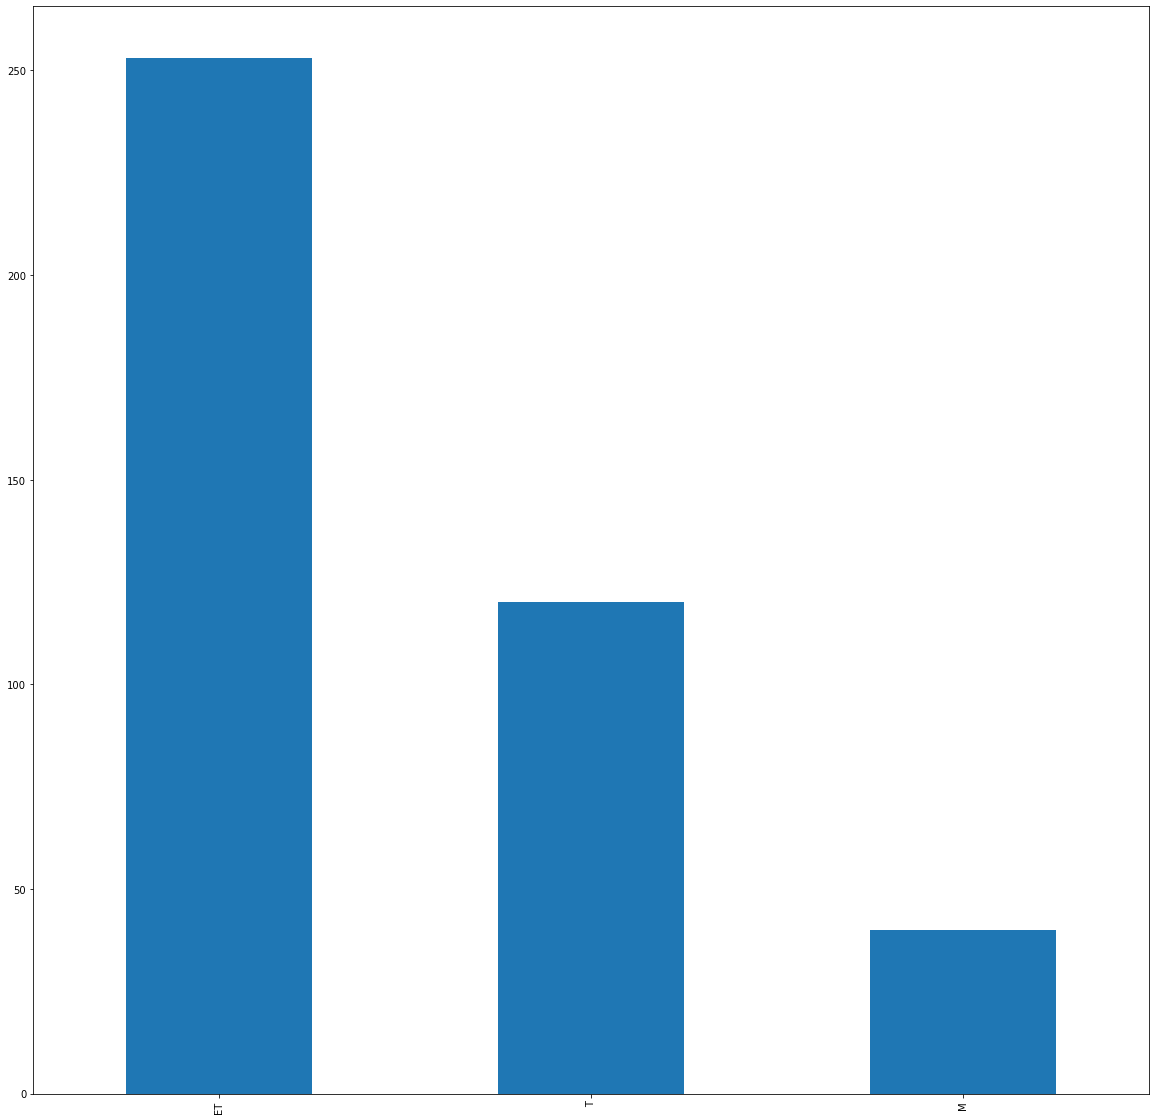

In [167]:
y1['esrb_rating'].value_counts().plot(kind = 'bar')

M    215
T      5
Name: esrb_rating, dtype: int64

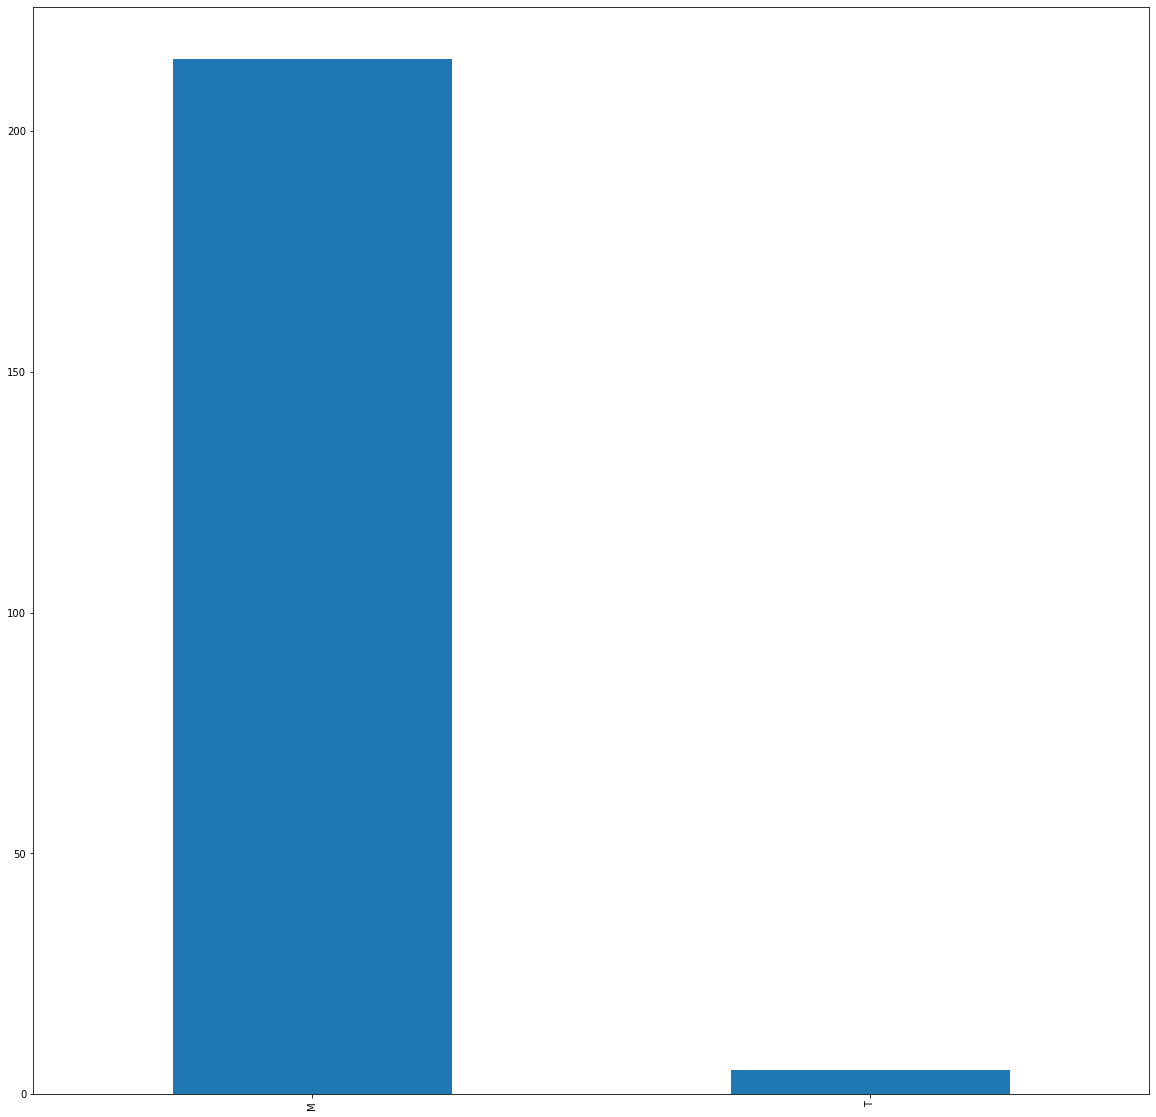

In [172]:
y2['esrb_rating'].value_counts().plot(kind = 'bar')
y2['esrb_rating'].value_counts()

<AxesSubplot:>

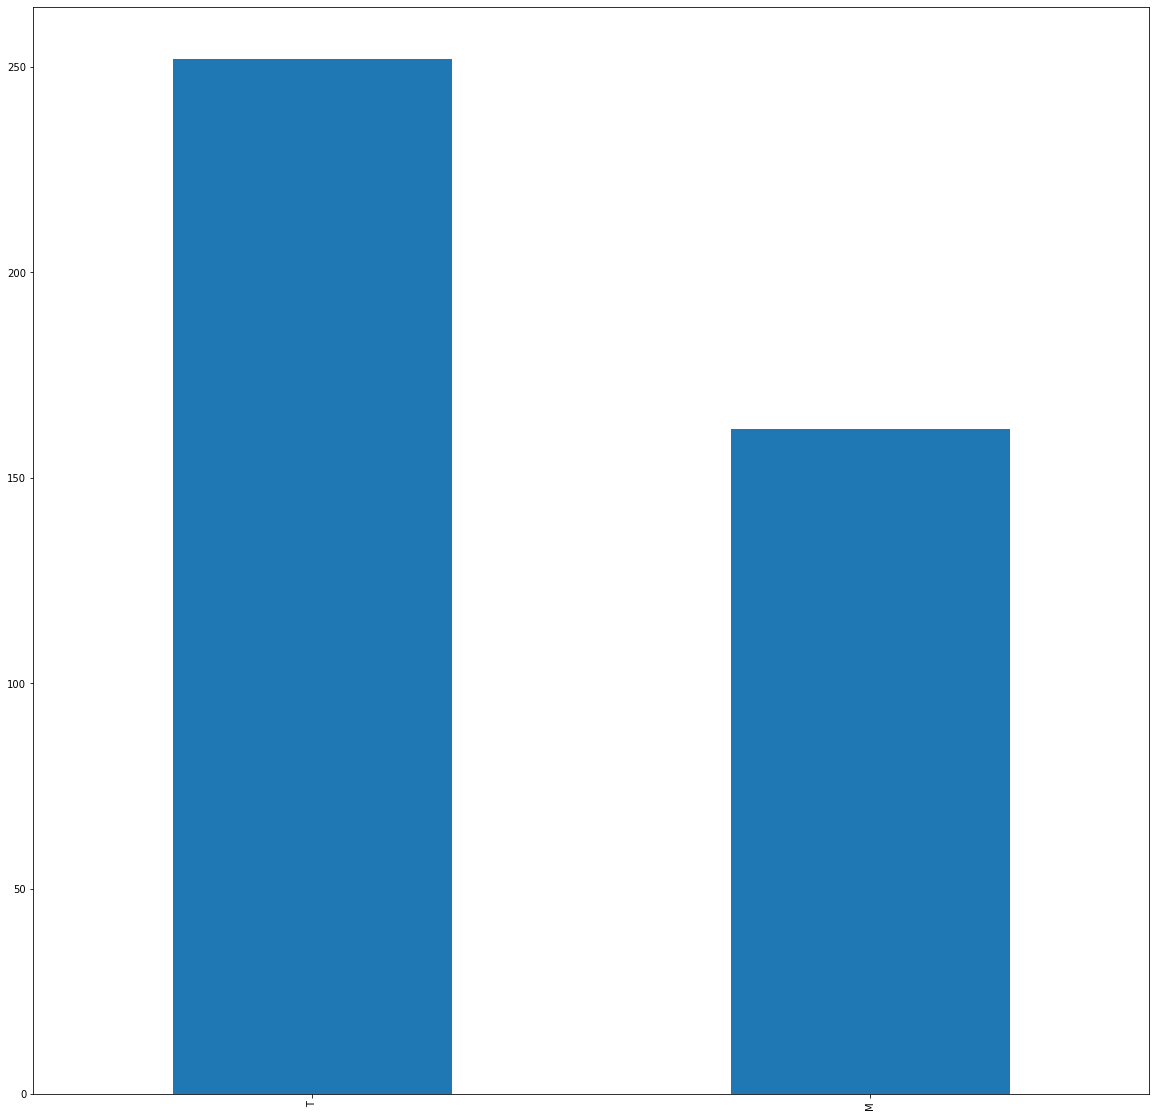

In [169]:
y3['esrb_rating'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

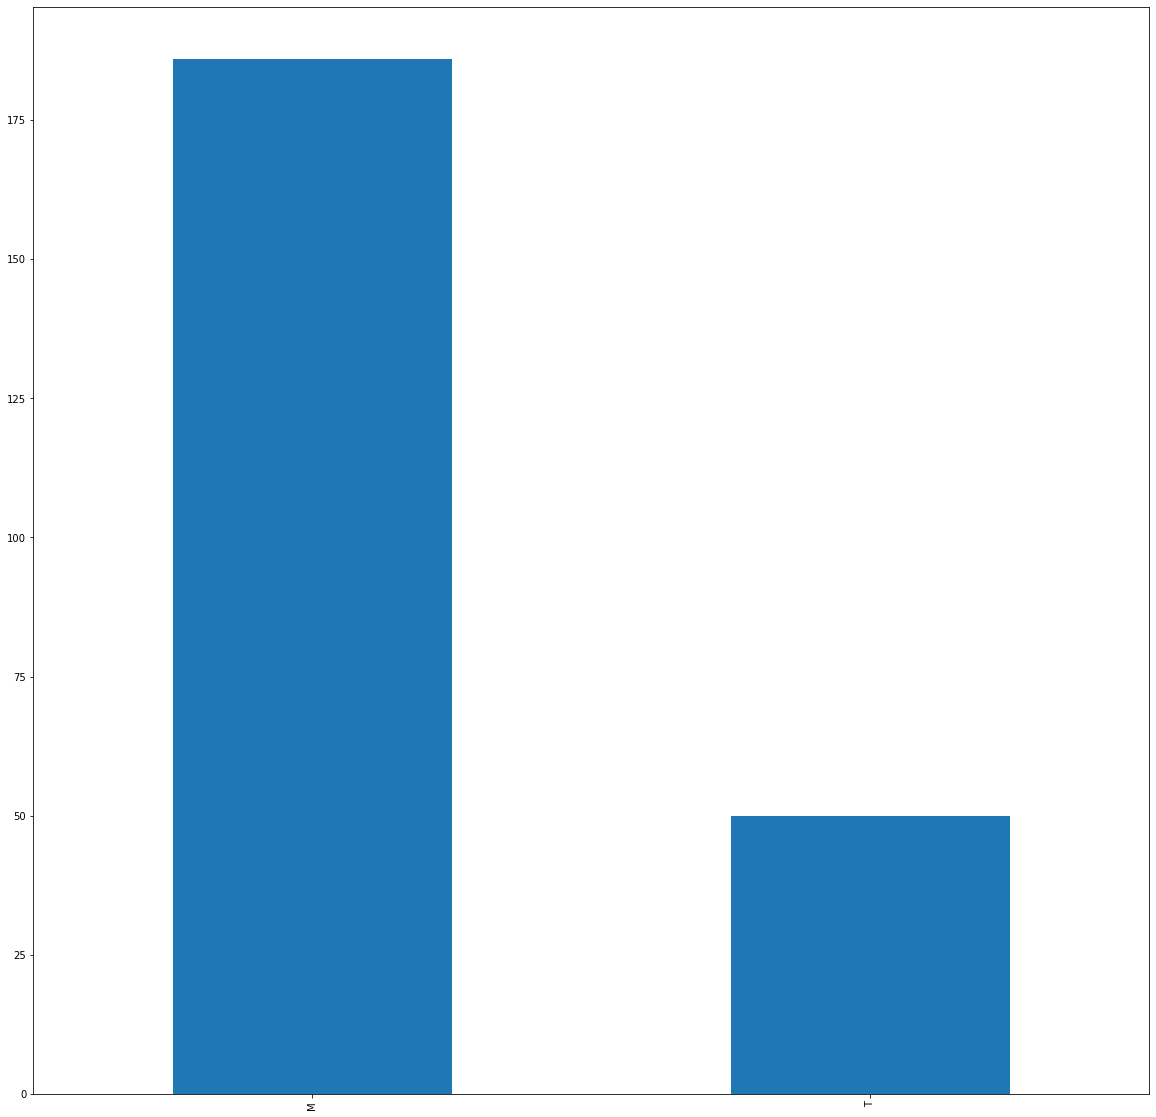

In [173]:
y4['esrb_rating'].value_counts().plot(kind = 'bar')

Final Comments

It's incredibly difficult to continue to tune a model that will give near 100% accuracy for any tree type on this dataset. In this case, more variables is more accurate because it seems that some variables are heavily weighted in the fact that if they contain ANY of the input variable, the outcome is already predetermined. Therefore it's hard to drop variables. Even then, some of the most heavily weighted variables do contain outliers. 

The different models all produced differently weighted input variables, which was unique. Even after trimming various variables the accuracy of the models all suffered. Even then, the outcomes were surprising in the fact that the variables which are considered more "weighty" at a glance, like nudity, were barely considered in the algorithms. The assumption is made that this is due to the fact there is such a low number of games which contain nudity. We could do endless EDA on this dataset to find more reasons why the model's presented as such, but at some point we have to just make assumptions.